# Preparing Iris dataset

In [1]:
from sklearn import datasets
import pandas as pd
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [2]:
data = datasets.load_iris()
data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [3]:
dataframe = pd.DataFrame(data = data.data,index = None,columns=data.feature_names)
dataframe['target'] = data.target
dataframe.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [4]:
X = data.data
Y = data.target
X.shape, Y.shape, data.target_names

((150, 4), (150,), array(['setosa', 'versicolor', 'virginica'], dtype='<U10'))

## 1. Train the Naive Bayes model without PCA and compare the result with PCA + Naive Bayes. Write down your observations. ##

### Applying naive bayes on iris dataset without PCA.

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB

In [6]:
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.30,random_state=53)
model = GaussianNB()
model.fit(X_train,y_train)

GaussianNB()

In [7]:
y_pred = model.predict(X_test)
print("Test Score : ",model.score(X_test,y_test))

Test Score :  0.9333333333333333


### Applying naive bayes on iris dataset with PCA.

In [8]:
pca = PCA(n_components=2)
pcaTr = pca.fit(X)
X_trf = pcaTr.transform(X)
X_train,X_test,y_train,y_test = train_test_split(X_trf,Y,test_size=0.30,random_state=53)
model.fit(X_train,y_train)

GaussianNB()

In [9]:
print("Test Score : ",model.score(X_test,y_test))

Test Score :  0.8666666666666667


 ### *Observation : Even with the lesser number feature we are getting almost same accuracy.* ###
 ### *Hence use of PCA will help the model to train faster, reduce processing speed and representation of data over graph is also possible.* ###

## 2) Run PCA on IRIS dataset. Visualise the output in 2 dimensions using to Principal components. Choose different pairs of principal components and note down your observations. ##

Predicted :  [0 0 2 1 2 2 2 0 1 2 0 1 2 0 2 1 1 1 2 0 1 2 1 0 1 0 0 1 1 0 2 1 1 2 2 2 1
 2 1 2 2 0 1 2 2]
Actual    :  [0 0 2 1 1 2 2 0 1 2 0 1 1 0 2 1 1 2 2 0 1 2 1 0 1 0 0 1 2 0 2 1 1 1 2 2 1
 1 1 2 2 0 1 2 2]
Train Score :  0.9333333333333333
Test Score :  0.8666666666666667
precision: 0.8709876543209876
recall: 0.8666666666666667


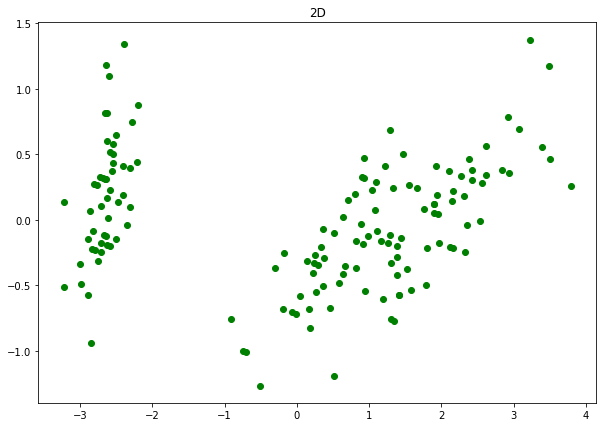

In [10]:
pca = PCA(n_components=2)
pcaTr = pca.fit(X)
X_trf = pcaTr.transform(X)
X_train,X_test,y_train,y_test = train_test_split(X_trf,Y,test_size=0.30,random_state=53)
model.fit(X_train,y_train)
y_pred = model.predict(X_test)

print("Predicted : ",y_pred)
print("Actual    : ",y_test)
print("Train Score : ",model.score(X_train,y_train))
print("Test Score : ",model.score(X_test,y_test))
precision =  metrics.precision_score(y_test,y_pred, average="weighted",zero_division=0)
recall = metrics.recall_score(y_test, y_pred, average="weighted",zero_division=0)
print('precision: {}'.format(precision))
print('recall: {}'.format(recall))

# Creating figure
fig = plt.figure(figsize = (10, 7))

# Creating plot
plt.scatter(X_trf[:,0], X_trf[:,1], color = "green")
plt.title("2D")
 
# show plot
plt.show()

In [11]:
for i in range(1,len(X[0]) + 1):
    pca = PCA(n_components=i)
    pcaTr = pca.fit(X)
    X_trf = pcaTr.transform(X)
    X_train,X_test,y_train,y_test = train_test_split(X_trf,Y,test_size=0.30,random_state=53)
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    print("NUMBER OF PCA : ",i)
    print("Predicted : ",y_pred)
    print("Actual    : ",y_test)
    print("Train Score : ",model.score(X_train,y_train))
    print("Test Score : ",model.score(X_test,y_test))
    precision =  metrics.precision_score(y_test,y_pred, average="weighted",zero_division=0)
    recall = metrics.recall_score(y_test, y_pred, average="weighted",zero_division=0)
    print('precision: {}'.format(precision))
    print('recall: {}'.format(recall))
    print('---------------------------------------------------------------------------')

NUMBER OF PCA :  1
Predicted :  [0 0 2 1 1 2 2 0 1 2 0 1 2 0 2 1 1 2 2 0 1 2 1 0 1 0 0 1 1 0 2 1 1 2 2 2 1
 2 1 2 2 0 1 2 2]
Actual    :  [0 0 2 1 1 2 2 0 1 2 0 1 1 0 2 1 1 2 2 0 1 2 1 0 1 0 0 1 2 0 2 1 1 1 2 2 1
 1 1 2 2 0 1 2 2]
Train Score :  0.9523809523809523
Test Score :  0.9111111111111111
precision: 0.9157407407407407
recall: 0.9111111111111111
---------------------------------------------------------------------------
NUMBER OF PCA :  2
Predicted :  [0 0 2 1 2 2 2 0 1 2 0 1 2 0 2 1 1 1 2 0 1 2 1 0 1 0 0 1 1 0 2 1 1 2 2 2 1
 2 1 2 2 0 1 2 2]
Actual    :  [0 0 2 1 1 2 2 0 1 2 0 1 1 0 2 1 1 2 2 0 1 2 1 0 1 0 0 1 2 0 2 1 1 1 2 2 1
 1 1 2 2 0 1 2 2]
Train Score :  0.9333333333333333
Test Score :  0.8666666666666667
precision: 0.8709876543209876
recall: 0.8666666666666667
---------------------------------------------------------------------------
NUMBER OF PCA :  3
Predicted :  [0 0 2 1 2 2 2 0 1 2 0 1 1 0 2 1 1 1 2 0 2 2 1 0 1 0 0 1 2 0 2 1 1 2 2 2 1
 2 1 2 2 0 1 2 2]
Actual    :  

## Observation ##
#### 1) Number of principle component : 1  Accuracy : 0.91 ####
#### 2) Number of principle component : 2  Accuracy : 0.86 ###
#### 3) Number of principle component : 3  Accuracy : 0.88 ###
#### Without reducing dimension                 Accuracy : 0.93 ####
### We are getting almost same score after reducing dimension.So instead of using 4 feature we can also use 1 feature for prediction. This help model to train faster and visualization is possible for humans. ###

## 3. Run PCA + Naive Bayes classifier on IRIS dataset and calculateprecision and recall of the system. ##

In [12]:
pca = PCA(n_components=2)
pcaTr = pca.fit(X)
X_trf = pcaTr.transform(X)
X_train,X_test,y_train,y_test = train_test_split(X_trf,Y,test_size=0.30,random_state=53)
model.fit(X_train,y_train)

GaussianNB()

In [13]:
y_pred = model.predict(X_test)
print("Predicted : ",y_pred)
print("Actual    : ",y_test)
print("Train Score : ",model.score(X_train,y_train))
print("Test Score : ",model.score(X_test,y_test))
precision =  metrics.precision_score(y_test,y_pred, average="weighted",zero_division=0)
recall = metrics.recall_score(y_test, y_pred, average="weighted",zero_division=0)
print('precision: {}'.format(precision))
print('recall: {}'.format(recall))

Predicted :  [0 0 2 1 2 2 2 0 1 2 0 1 2 0 2 1 1 1 2 0 1 2 1 0 1 0 0 1 1 0 2 1 1 2 2 2 1
 2 1 2 2 0 1 2 2]
Actual    :  [0 0 2 1 1 2 2 0 1 2 0 1 1 0 2 1 1 2 2 0 1 2 1 0 1 0 0 1 2 0 2 1 1 1 2 2 1
 1 1 2 2 0 1 2 2]
Train Score :  0.9333333333333333
Test Score :  0.8666666666666667
precision: 0.8709876543209876
recall: 0.8666666666666667
